# fig 5 comparison

In [9]:
fig5 = loadpickle("Notebooks/2016bfig5.p", python2topython3=True)

In [10]:
def fig5_plot(logM1, ax, ratioFlag=False, legendFlag=False, excludelabels=['HS Subfind', 'MSII Subfind'], computeRatioFromSHMF=False):
    #2016b Fig5 colors
    #colorsd = {'MSII Subfind':'#983334', 'HS Subfind':'#FF9833', 'GIF SURV':'#FF004B', 'Bolshoi BDM':'#6500CC', 'Bolshoi Rockstar':'#0000FF', 'MultiDark BDM':'#6666CC', 'MultiDark Rockstar':'#660066'}
    colorsd = {k:COLOR_SCHEME[i] for i,k in enumerate(['GIF SURV','Bolshoi BDM','Bolshoi Rockstar','MultiDark BDM','MultiDark Rockstar'])}
    """Plot 2016B Figure 5 plot of M range [M1, M1+0.5]."""
    if legendFlag:
        for label, c in colorsd.items():
            if label in excludelabels:
                continue
            ax.plot([], [], '-', label=label, alpha=1., c=c)
        return
    for label, x, y, xlr, ylr in fig5[logM1]:
        if label in excludelabels:
            continue
        if ratioFlag:
            if computeRatioFromSHMF:
                ax.plot(x, 10**(y-fitting_model(x, logM1)), '-', label=label, alpha=1., c=colorsd[label], zorder=-1)
            else:
                ax.plot(xlr, 10**ylr, '-', label=label, alpha=1., c=colorsd[label], zorder=-1)
            
        else:
            ax.plot(x, y, '-', label=label, alpha=1., c=colorsd[label], zorder=-1)

In [11]:
def fitting_model(log_m_over_M, logM1):
    Amd = {12:0.045, 13:0.058, 14:0.080}
    Am, alpha = Amd[logM1], 0.86
    psi = 10**log_m_over_M
    return np.log10( Am * psi**(-alpha) * np.exp(-50.*psi**4.0) )

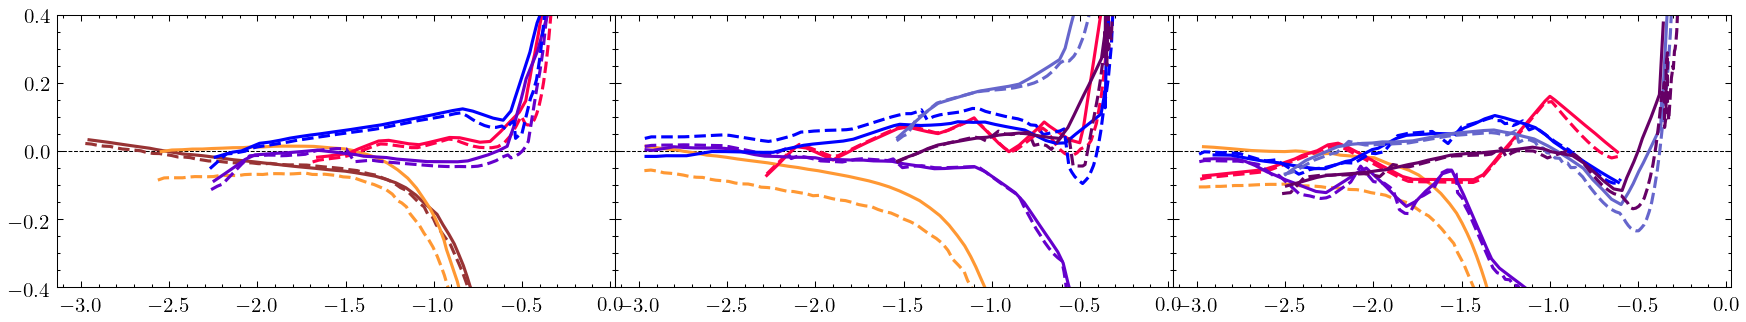

In [208]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=[4.8*3,4.8*.5], dpi=150)
fig5_plot(12, ax1, ratioFlag=True)
fig5_plot(13, ax2, ratioFlag=True)
fig5_plot(14, ax3, ratioFlag=True)
ax1.set_ylim(-0.4,.4)
ax1.axhline(0, ls='--', c='k', zorder=-1, lw=.5)
ax2.axhline(0, ls='--', c='k', zorder=-1, lw=.5)
ax3.axhline(0, ls='--', c='k', zorder=-1, lw=.5)

# SHMF M definition tests

In [12]:
sod_cols = ['fof_halo_tag', 'sod_halo_cdelta', 'fof_halo_mass', 'sod_halo_mass',
                        'fof_halo_center_x','fof_halo_center_y','fof_halo_center_z',
                        'sod_halo_mean_x', 'sod_halo_mean_y', 'sod_halo_mean_z',
                        'sod_halo_radius']

In [13]:
sod_SV0 = gio_read_dict('/home/isultan/data/LJDS/M200/m000p-499.haloproperties', sod_cols)

In [14]:
sod_AQ0 = gio_read_dict('/home/isultan/data/AlphaQ/M200/m000-499.haloproperties', sod_cols)

In [15]:
sod_HM0 = gio_read_dict('/home/isultan/data/SHfindertests/HM_final/M200/m000p-499.haloproperties', sod_cols)

#remove the fof halo tag that shows up twice since it's not in sh_HM0 and has mass much lower than min. host mass bin and concentration -101
sod_HM0_nodupsmask = (sod_HM0['fof_halo_tag']!=2934957508).copy()
sod_HM0 = {k:sod_HM0[k][sod_HM0_nodupsmask] for k in sod_HM0.keys() if sod_HM0[k] is not None}

Variable not found
Variable not found
Variable not found


## HM0 max mass host halos

In [58]:
print(sod_HM0['fof_halo_mass'][sod_HM0['fof_halo_mass']>10**14.5])
print(sod_HM0['fof_halo_tag'][sod_HM0['fof_halo_mass']>10**14.5])

[3.1982867e+14 5.5204070e+14 3.5186345e+14 3.3173623e+14 5.1249811e+14
 4.7063205e+14 3.5927989e+14 4.4327599e+14 3.9735444e+14 4.3248401e+14
 4.8658752e+14 4.3048689e+14 3.2506353e+14 4.1041942e+14 3.6917002e+14
 7.2415034e+14 3.5427806e+14 5.8535874e+14 3.2260959e+14 4.3249418e+14
 3.2742153e+14 6.9143269e+14 3.7970054e+14 8.2864079e+14 7.3619290e+14
 6.0713248e+14 3.3917018e+14 7.5320170e+14 5.5667712e+14 1.2846113e+15
 4.0487771e+14 3.3556076e+14 3.1852833e+14 3.2276360e+14 5.5267203e+14
 4.5040976e+14 7.6739026e+14 5.3378474e+14 1.5630081e+15]
[ 4012181443  1504663677  1224843105  5258021677  5046295230  6186173238
  3214342784  9323973097  9034614527  9950848231 10800569881  8715099005
 14036156196 13217056921 11270783222 14071363555 15961499633 16298194740
 17307678734 18161682648 19895625353 18546348468 18993004586 18031818845
 18194819340 19854964909 22717034202 23643680933 22935670293 25166644998
 22063046482 23827469853 22778775530   104245581 26616104007 28277822541
 270409

## assert_x0_unique exploration

In [16]:
duplicate_rows(sod_HM0, 'fof_halo_tag', printSame=True)
print('-'*50)
duplicate_rows(sod_SV0, 'fof_halo_tag')
print('-'*50)
duplicate_rows(sod_AQ0, 'fof_halo_tag')
print('-'*50)
np.sum(sh_HM0['fof_halo_tag']==2934957508)

There are 0 fof_halo_tag that have at least 1 duplicate.
Any fof_halo_tag shows up at most 1 times.

--------------------------------------------------
There are 0 fof_halo_tag that have at least 1 duplicate.
Any fof_halo_tag shows up at most 1 times.

--------------------------------------------------
There are 0 fof_halo_tag that have at least 1 duplicate.
Any fof_halo_tag shows up at most 1 times.

--------------------------------------------------


0

## Merge approximate run halos HM z=0: 6186173238, 3214342784, 22935670293, 725462990

In [17]:
missing_halos_HM0 = [6186173238, 3214342784, 22935670293, 725462990]
missing_halos_HM0_sodmask = np.isin(sod_HM0['fof_halo_tag'], missing_halos_HM0)
missing_halos_HM0_fht = sod_HM0['fof_halo_tag'][missing_halos_HM0_sodmask]
missing_halos_HM0_x = sod_HM0['fof_halo_center_x'][missing_halos_HM0_sodmask]
missing_halos_HM0_y = sod_HM0['fof_halo_center_y'][missing_halos_HM0_sodmask]
missing_halos_HM0_z = sod_HM0['fof_halo_center_z'][missing_halos_HM0_sodmask]
missing_halos_HM0_fhm = sod_HM0['fof_halo_mass'][missing_halos_HM0_sodmask]

In [18]:
sh_vars = ['fof_halo_tag','subhalo_mean_vx', 'subhalo_mean_vy', 'subhalo_mean_vz', 'subhalo_count', 'subhalo_tag', 'subhalo_mass', 'fof_halo_count']
sh_HM0_approx = gio_read_dict('/home/isultan/data/ALCC/subhalos/STEP{0}/m000p-{0}.subhaloproperties'.format(499), sh_vars)
sh_HM0_approxnew = gio_read_dict('/home/isultan/data/SHfindertests/HM_final/subhalos_approxnew/m000p-{0}.subhaloproperties'.format(499), sh_vars)

sh_HM0_approx['M'] = sh_HM0_approx['fof_halo_count']*PARTICLEMASS['HM']
sh_HM0_approxnew['M'] = sh_HM0_approxnew['fof_halo_count']*PARTICLEMASS['HM']

In [19]:
assert ~np.any(np.isin(missing_halos_HM0, sh_HM0_approx['fof_halo_tag'])), 'sh_HM0_approx has at least one missing halo'
assert np.all(np.isin(missing_halos_HM0, sh_HM0_approxnew['fof_halo_tag'])), 'sh_HM0_approxnew does not have all missing halos'

In [20]:
hp_vars = ['fof_halo_tag', 'fof_halo_mass', 'fof_halo_center_x', 'fof_halo_center_y', 'fof_halo_center_z']
hp_HM0_approx = gio_read_dict('/home/isultan/data/ALCC/subhalos/STEP{0}/m000p-{0}.haloproperties'.format(499), hp_vars)
assert np.isin(sh_HM0_approx['fof_halo_tag'], hp_HM0_approx['fof_halo_tag']).all(), 'subhalos exist that are in hosts that are not in haloproperties!'

assert np.isin(hp_HM0_approx['fof_halo_mass'], missing_halos_HM0_fhm).sum()==len(missing_halos_HM0_fhm), 'No 1:1 match between fof halo mass'
hp_HM0_approx_highmassmask = (hp_HM0_approx['fof_halo_mass']>1e13).copy()
hp_HM0_approx = {k:hp_HM0_approx[k][hp_HM0_approx_highmassmask] for k in hp_HM0_approx.keys()}

In [21]:
missing_halos_HM0_fht_matches = []
for i in range(len(missing_halos_HM0_fhm)):
    dr = SHMLM_HM.dist(periodic_bcs(hp_HM0_approx['fof_halo_center_x'], missing_halos_HM0_x[i], SHMLM_HM.BOXSIZE),
                       periodic_bcs(hp_HM0_approx['fof_halo_center_y'], missing_halos_HM0_y[i], SHMLM_HM.BOXSIZE),
                       periodic_bcs(hp_HM0_approx['fof_halo_center_z'], missing_halos_HM0_z[i], SHMLM_HM.BOXSIZE),
                       missing_halos_HM0_x[i], 
                       missing_halos_HM0_y[i], 
                       missing_halos_HM0_z[i])
    assert hp_HM0_approx['fof_halo_mass'][np.argmin(dr)]==missing_halos_HM0_fhm[i], 'min(dr) approx. host halo does not have matching fof halo mass'
    print(f"Match found for {missing_halos_HM0_fht[i]}: {hp_HM0_approx['fof_halo_tag'][np.argmin(dr)]}")
    missing_halos_HM0_fht_matches.append(hp_HM0_approx['fof_halo_tag'][np.argmin(dr)])
print(missing_halos_HM0_fht_matches)

Match found for 6186173238: 5987802012
Match found for 3214342784: 2733491991
Match found for 22935670293: 22133346765
Match found for 725462990: 28593700637
[5987802012, 2733491991, 22133346765, 28593700637]


In [22]:
sh_HM0_approx['fof_halo_tag'] = replace_elems(sh_HM0_approx['fof_halo_tag'], missing_halos_HM0_fht_matches, missing_halos_HM0_fht)

sh_HM0_using_approx = combine_dicts(sh_HM0, grep_dict(sh_HM0_approx, 'fof_halo_tag', missing_halos_HM0))
sh_HM0_using_approxnew = combine_dicts(sh_HM0, grep_dict(sh_HM0_approxnew, 'fof_halo_tag', missing_halos_HM0))

## Mass bin shifting tests

In [23]:
hosts_in_sh(sod_HM0, sh_HM0, SHMLM_HM, 0)
print('-'*120)
hosts_in_sh(sod_SV0, sh_SV0, SHMLM_SV, 0)
print('-'*120)
hosts_in_sh(sod_AQ0, sh_AQ0, SHMLM_AQ, 0)

For bin [14.  14.5], there are 4 missing host halos. This is 1.0723860589812333% of the 373 host halos in this bin (for which c>0).
Missing halos (fof_halo_tag): [ 6186173238  3214342784 22935670293   725462990]
Missing halos (log10 fof_halo_mass): [14.672682 14.555433 14.745604 14.727366]
Missing halos (log10 sod_halo_mass): [14.180159 14.291673 14.318147 14.358524]
Missing halos (log10 M200_to_Mvir): [14.251903 14.377018 14.420633 14.456833]

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


In [24]:
hosts_in_sh(sod_HM0, sh_HM0_using_approx, SHMLM_HM, 0)
print('-'*120)
hosts_in_sh(sod_HM0, sh_HM0_using_approxnew, SHMLM_HM, 0)
print('-'*120)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


## Plot SHMF

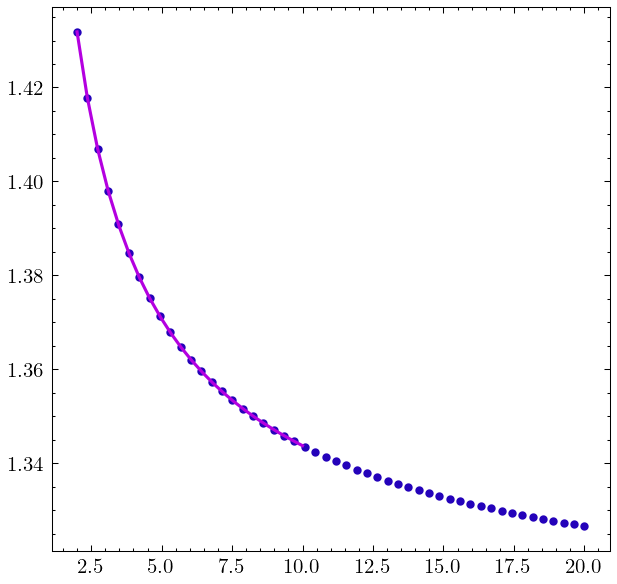

In [29]:
xf = np.linspace(2,20, 50)
yf = root(f_xvir, args=(xf, SHMLM_AQ.delta_vir(0)), x0=np.ones_like(xf)).x
plt.plot(xf, yf, '.')

fin = interp1d(xf, yf, fill_value='extrapolate')

xf2 = np.linspace(2,10, 200)
plt.plot(xf2, fin(xf2), '-')

In [26]:
sh_HM0_Mdef = sh_Mfof_convert(sh_HM0, sod_HM0['fof_halo_tag'], sod_HM0['sod_halo_cdelta'], sod_HM0['sod_halo_mass'], SHMLM_HM)
sh_SV0_Mdef = sh_Mfof_convert(sh_SV0, sod_SV0['fof_halo_tag'], sod_SV0['sod_halo_cdelta'], sod_SV0['sod_halo_mass'], SHMLM_SV)
sh_AQ0_Mdef = sh_Mfof_convert(sh_AQ0, sod_AQ0['fof_halo_tag'], sod_AQ0['sod_halo_cdelta'], sod_AQ0['sod_halo_mass'], SHMLM_AQ)

Subhalos with host in cdelta lookup table: 100.0% of all subhalos
subhalos (including centrals) found in sod catalog that have negative c: 1912 out of 4117521 (0.046435707310296656 %)
0.00017226674 624.9255

Subhalos with host in cdelta lookup table: 100.0% of all subhalos
subhalos (including centrals) found in sod catalog that have negative c: 515153 out of 774072 (66.55104434729586 %)
0.003226827 49.936092

Subhalos with host in cdelta lookup table: 100.0% of all subhalos
subhalos (including centrals) found in sod catalog that have negative c: 371153 out of 616364 (60.216527895853744 %)
0.020990979 57.507416



HM nH_sh 39500
SV nH_sh 39174
AQ nH_sh 36136
HM nH_sh 4738
SV nH_sh 4627
AQ nH_sh 4242
HM nH_sh 348
SV nH_sh 308
AQ nH_sh 274


/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


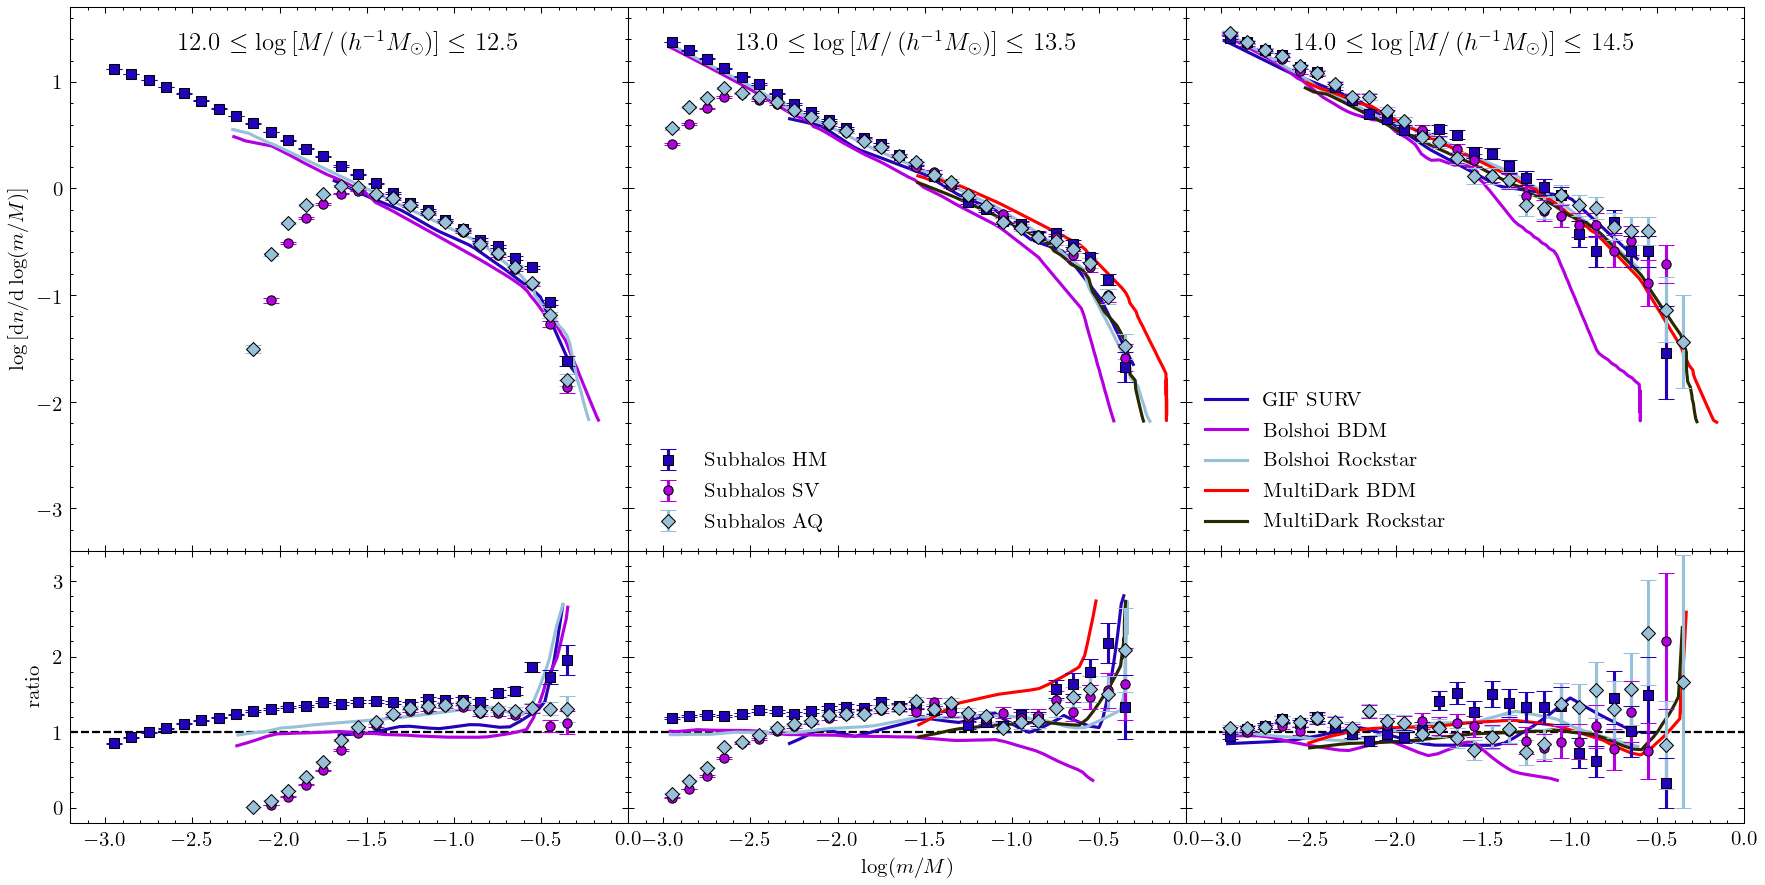

In [54]:
sh_finder_comparison(sh_HM0_Mdef, sh_SV0_Mdef, sh_AQ0_Mdef, 'M')
# plt.savefig('Paper2Figs/shmf_HM_SV_AQ_Mfof.pdf')

HM nH_sh 38244
SV nH_sh 37867
AQ nH_sh 33609
HM nH_sh 4485
SV nH_sh 4321
AQ nH_sh 3829
HM nH_sh 294
SV nH_sh 267
AQ nH_sh 221


/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


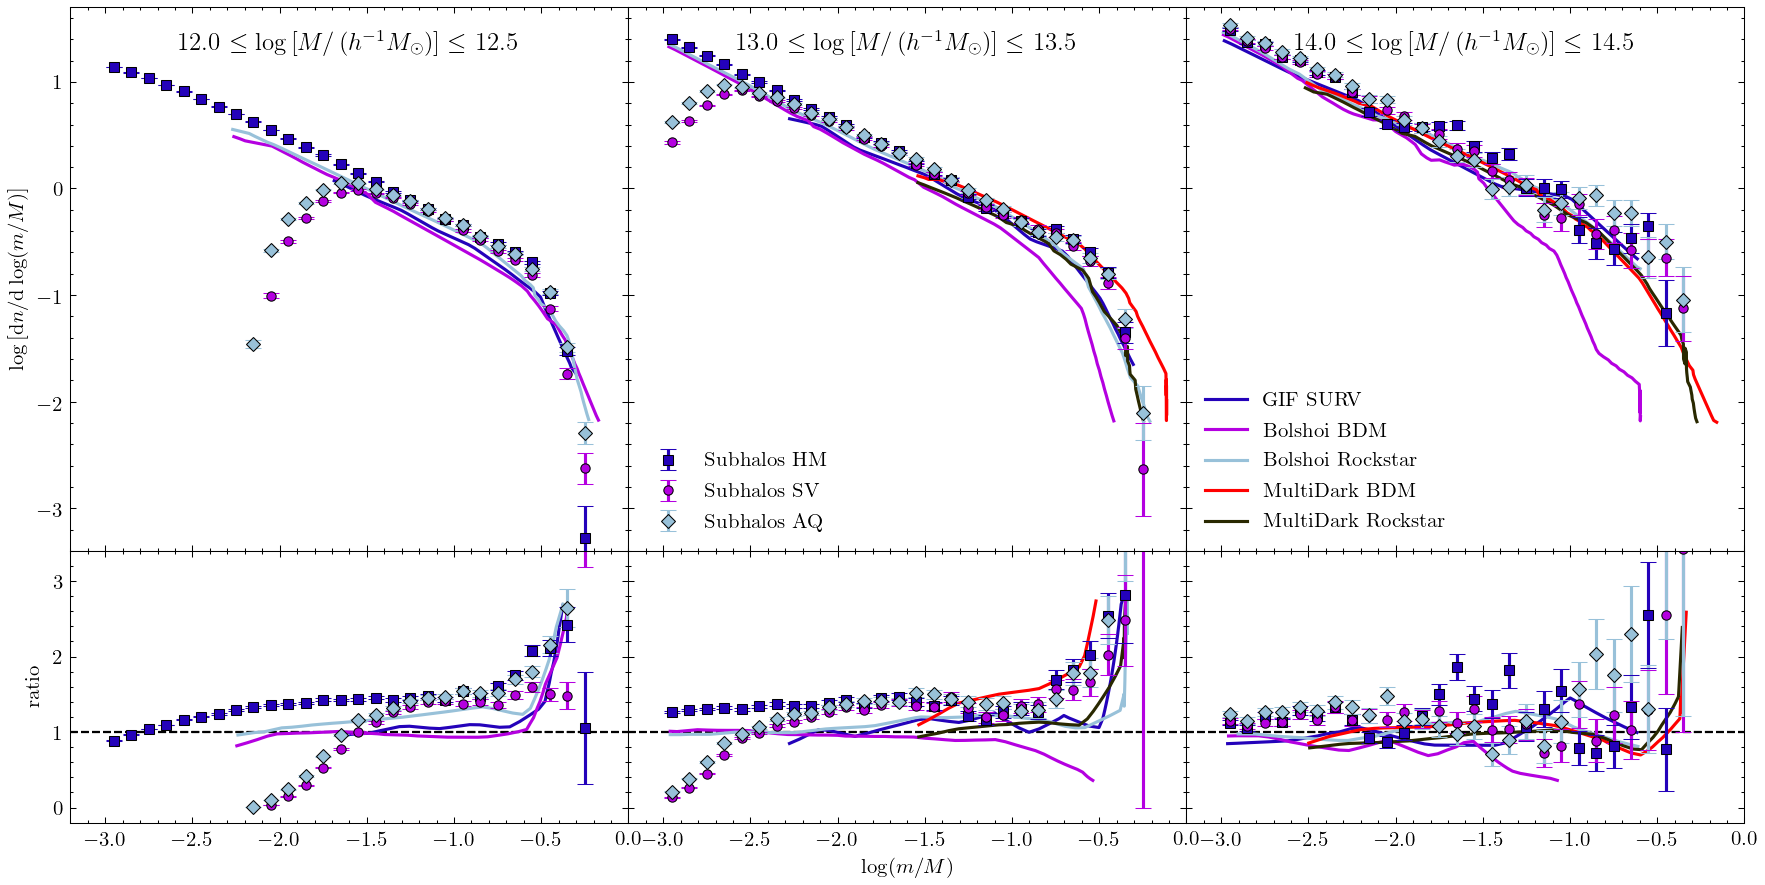

In [55]:
sh_finder_comparison(sh_HM0_Mdef, sh_SV0_Mdef, sh_AQ0_Mdef, 'Mfof_to_M200')
# plt.savefig('Paper2Figs/shmf_HM_SV_AQ_M200.pdf')

HM nH_sh 46456
SV nH_sh 44990
AQ nH_sh 38022
HM nH_sh 5504
SV nH_sh 5393
AQ nH_sh 4413
HM nH_sh 422
SV nH_sh 362
AQ nH_sh 277


/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


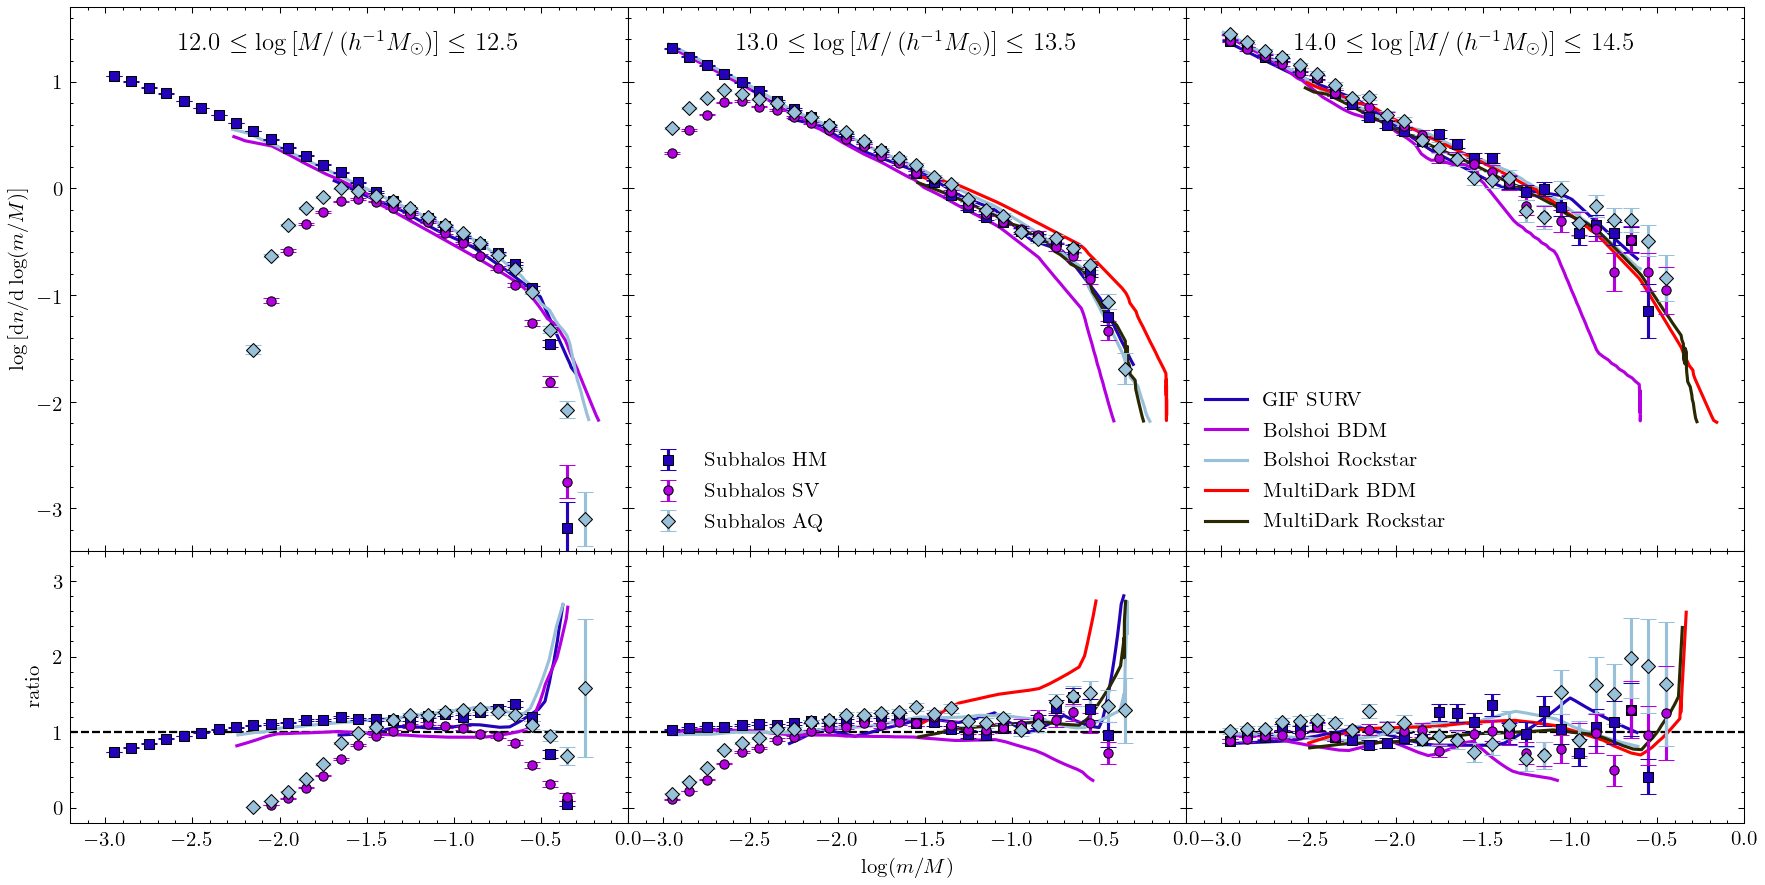

In [56]:
sh_finder_comparison(sh_HM0_Mdef, sh_SV0_Mdef, sh_AQ0_Mdef, 'Mfof_to_M200_to_Mvir')
# plt.savefig('Paper2Figs/shmf_HM_SV_AQ_Mvir.pdf')

HM nH_sh 36069
SV nH_sh 34783
AQ nH_sh 30569
HM nH_sh 4147
SV nH_sh 3872
AQ nH_sh 3404
HM nH_sh 268
SV nH_sh 226
AQ nH_sh 160


/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


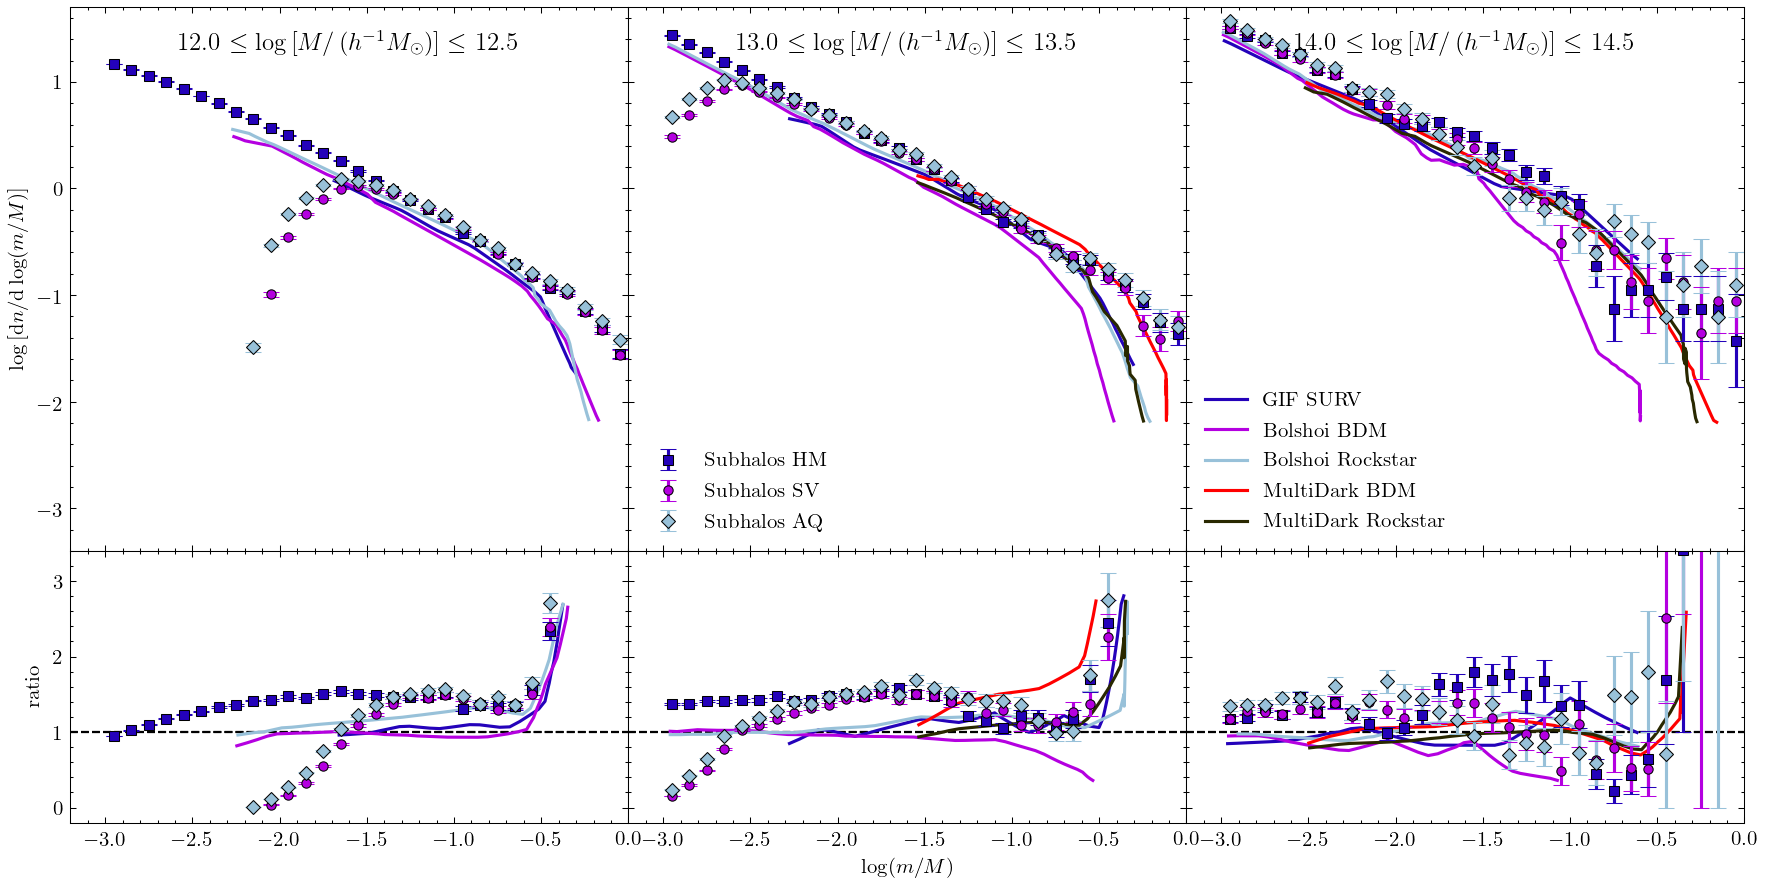

In [74]:
sh_finder_comparison(sh_HM0_Mdef, sh_SV0_Mdef, sh_AQ0_Mdef, 'M200')
# plt.savefig('Paper2Figs/shmf_HM_SV_AQ_M200_SO.pdf')

HM nH_sh 42179
SV nH_sh 40453
AQ nH_sh 36250
HM nH_sh 4962
SV nH_sh 4753
AQ nH_sh 4262
HM nH_sh 373
SV nH_sh 304
AQ nH_sh 255


/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
/home/isultan/projects/itk/itk.py:107: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:123: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


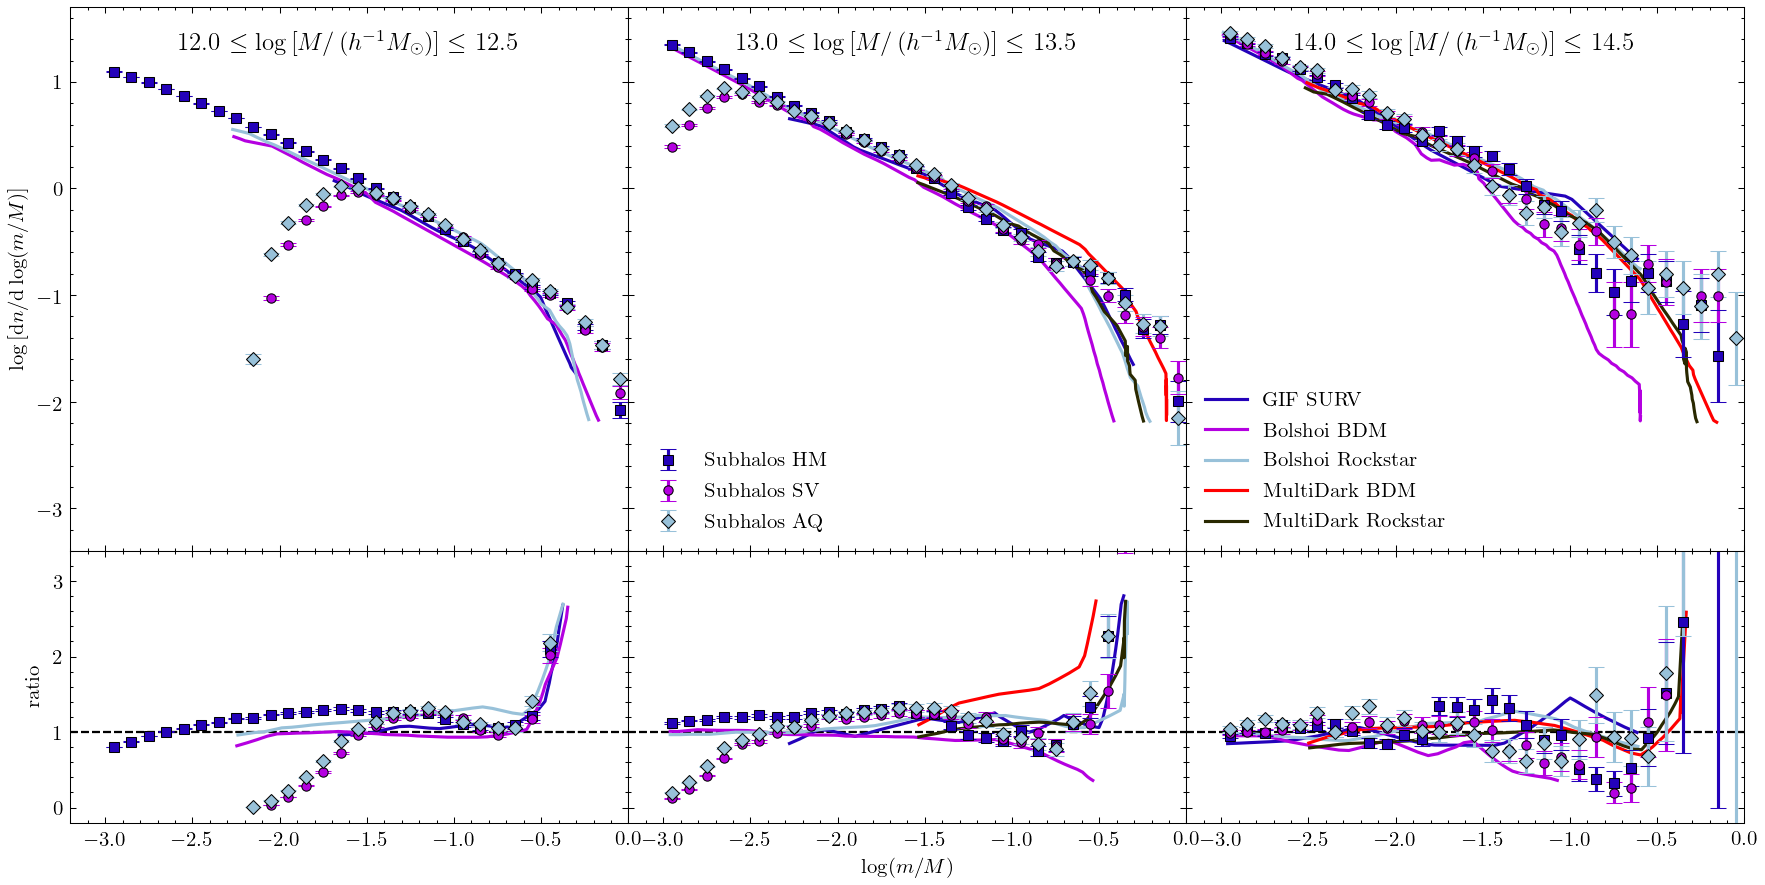

In [75]:
sh_finder_comparison(sh_HM0_Mdef, sh_SV0_Mdef, sh_AQ0_Mdef, 'M200_to_Mvir')
# plt.savefig('Paper2Figs/shmf_HM_SV_AQ_Mvir_SO.pdf')

HM nH_sh 39505
HM number of subhalos in bin 541343
Mavg (sh centrals): 1.6998932043768762e+12
SV nH_sh 40628
SV number of subhalos in bin 35236
Mavg (sh centrals): 1.7033923415564163e+12
AQ nH_sh 37181
AQ number of subhalos in bin 35476
Mavg (sh centrals): 1.6995318519196292e+12


/home/isultan/projects/itk/itk.py:138: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:154: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


HM nH_sh 4738
HM number of subhalos in bin 563608
Mavg (sh centrals): 1.6894267260209486e+13
SV nH_sh 4797
SV number of subhalos in bin 36337
Mavg (sh centrals): 1.6754462182588432e+13
AQ nH_sh 4335
AQ number of subhalos in bin 35520
Mavg (sh centrals): 1.6786812017213283e+13


/home/isultan/projects/itk/itk.py:138: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:154: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
/home/isultan/projects/itk/itk.py:138: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:154: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


HM nH_sh 348
HM number of subhalos in bin 376015
Mavg (sh centrals): 1.6276116409286797e+14
SV nH_sh 337
SV number of subhalos in bin 21791
Mavg (sh centrals): 1.6433543829330672e+14
AQ nH_sh 286
AQ number of subhalos in bin 19380
Mavg (sh centrals): 1.5593752145707772e+14
ax1 ylim (-3.4, 1.7)
ax4 ylim (-0.2, 3.4)
ax1 xlim (-3.2, 0.0)


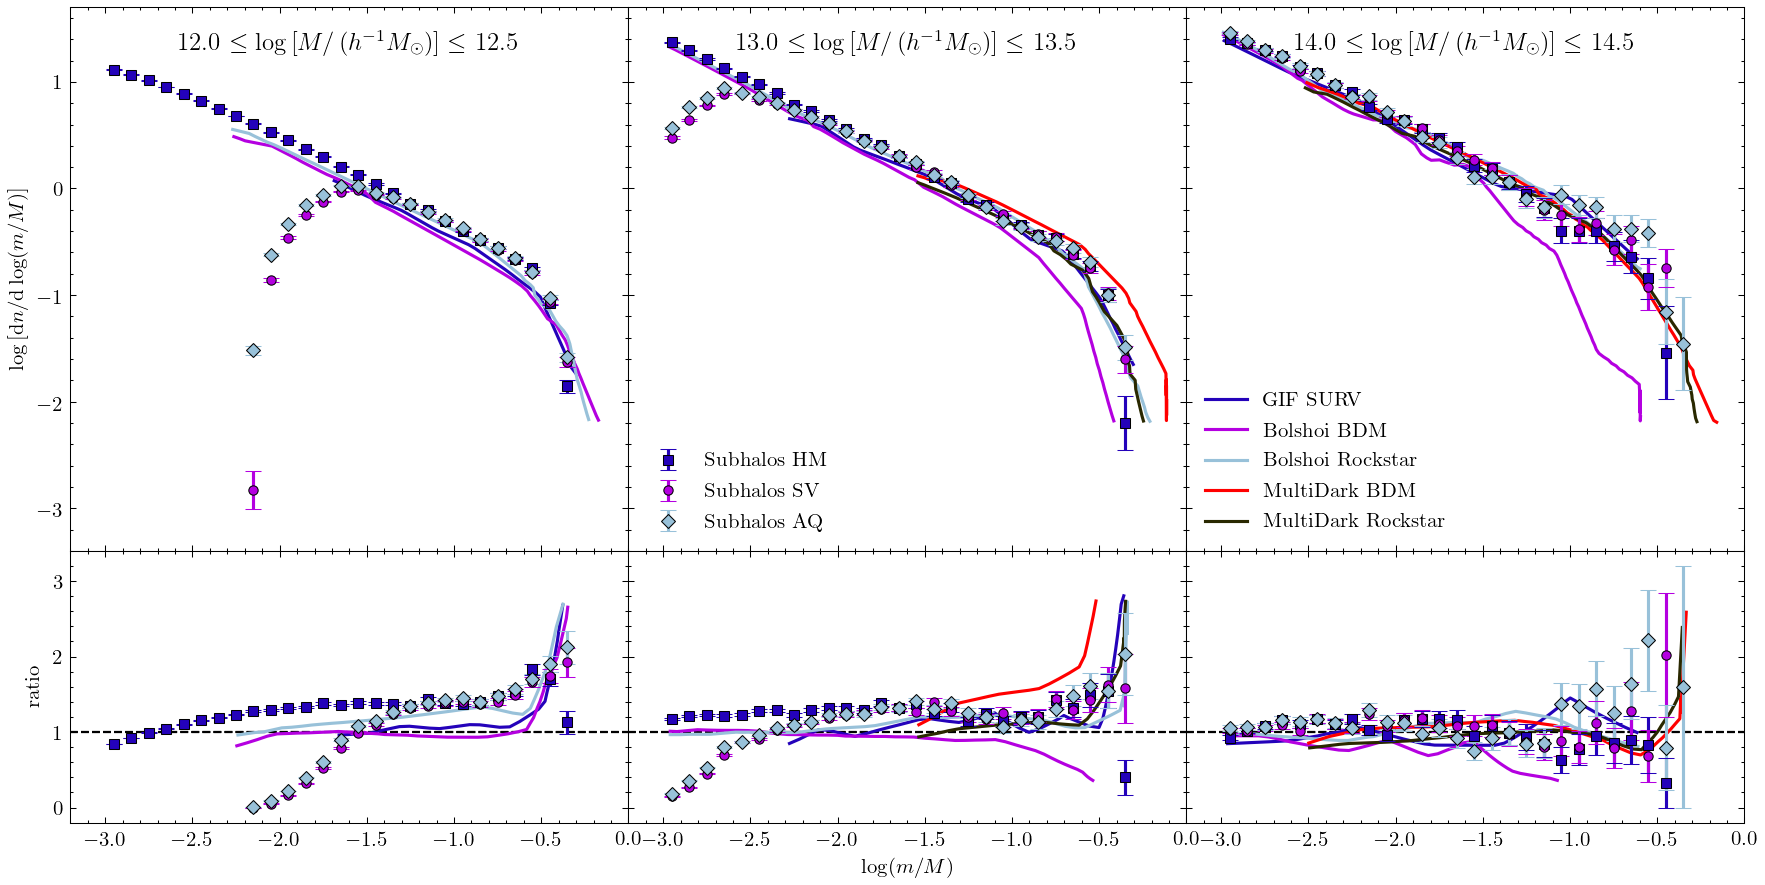

In [57]:
sh_finder_comparison(sh_HM0, sh_SV0, sh_AQ0, 'M')

HM nH_sh 42183
HM number of subhalos in bin 544173
Mavg (sh centrals): 1.6948569e+12
SV nH_sh 41128
SV number of subhalos in bin 33739
Mavg (sh centrals): 1.7062902e+12
SV lim: -1.4359788010504735
AQ nH_sh 36524
AQ number of subhalos in bin 33586
Mavg (sh centrals): 1.7051474e+12


/home/isultan/projects/itk/itk.py:154: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:170: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


HM nH_sh 4965
HM number of subhalos in bin 563439
Mavg (sh centrals): 1.6872311e+13
SV nH_sh 4929
SV number of subhalos in bin 36355
Mavg (sh centrals): 1.6763596e+13
SV lim: -2.4282930957011684
AQ nH_sh 4354
AQ number of subhalos in bin 35611
Mavg (sh centrals): 1.673586e+13
HM nH_sh 369


/home/isultan/projects/itk/itk.py:154: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:170: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


HM number of subhalos in bin 364148
Mavg (sh centrals): 1.5920962e+14
SV nH_sh 331
SV number of subhalos in bin 20770
Mavg (sh centrals): 1.6238656e+14
AQ nH_sh 267
AQ number of subhalos in bin 18007
Mavg (sh centrals): 1.5054265e+14
ax1 ylim (-3.4, 1.71)
ax4 ylim (-0.2, 2.2)
ax1 xlim (-3.15, 0.15000000000000002)


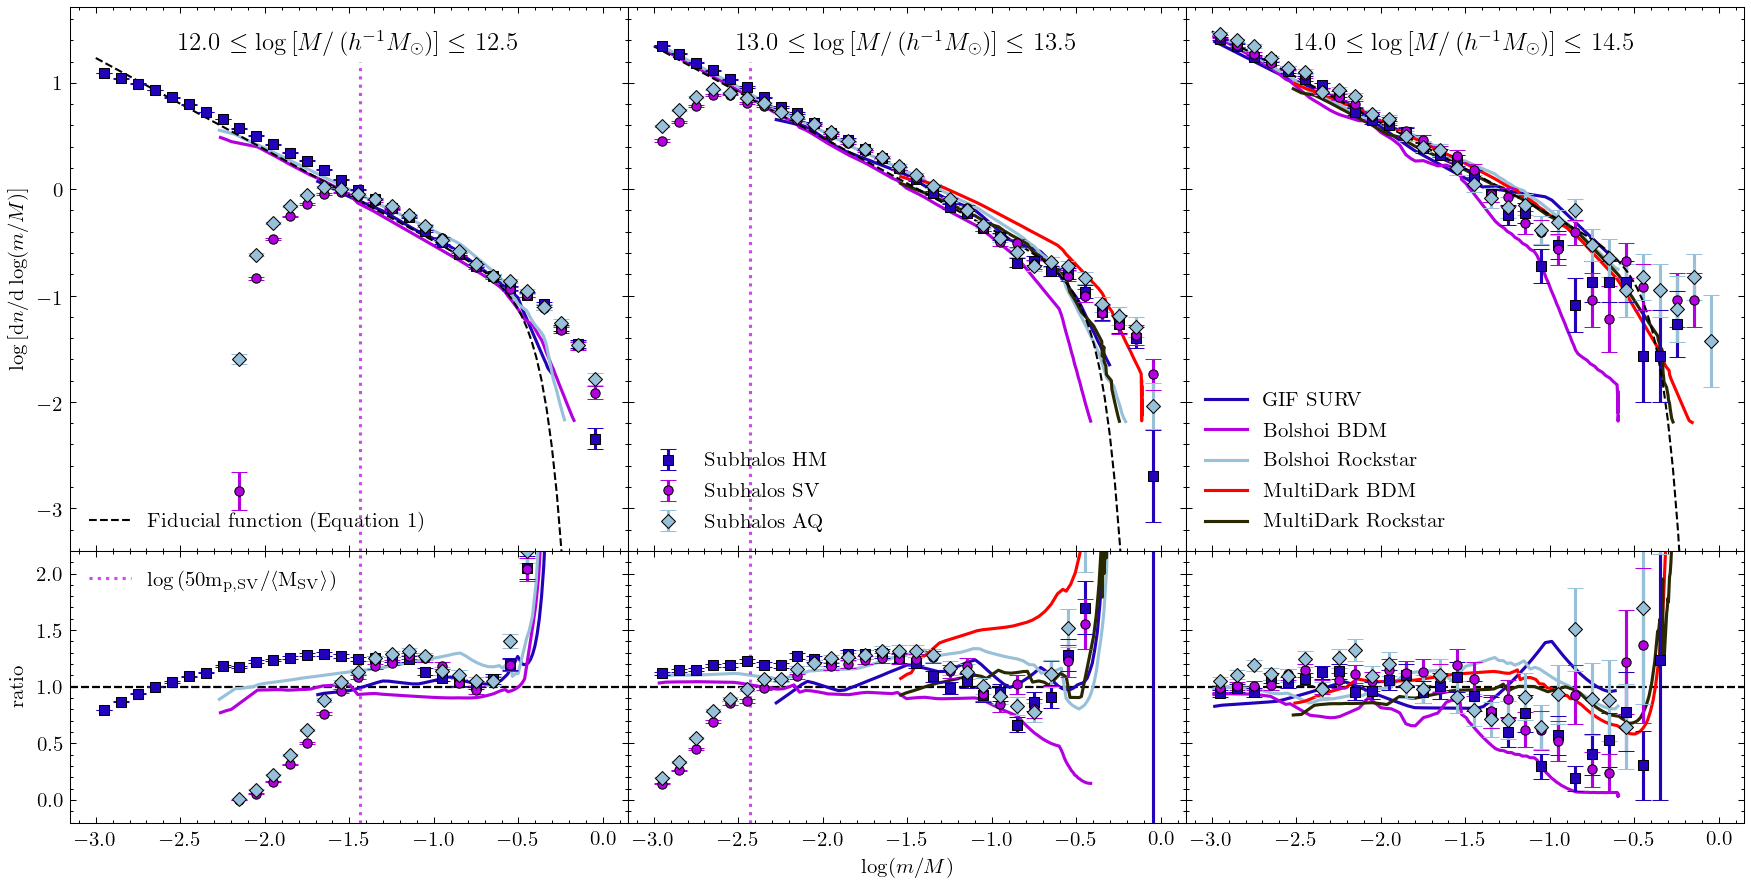

In [41]:
# (a) HM SHMFs computed without subhalos for the four missing host halos
sh_finder_comparison(sh_HM0_Mdef, 
                     sh_SV0_Mdef, 
                     sh_AQ0_Mdef, 
                     'M200_to_Mvir', setoriglims=False, computeRatioFromSHMF=True, addFiducialModels=True, addvlinelim=True)
# plt.savefig('Paper2Figs/shmf_HM_SV_AQ_Mvir_SO_noax1lim.pdf')

# ratios of vdB Fig 5 SH finders is computed using the solid lines in above panels
# fitting models 
# vertical line at 50 SV particles
# plt.savefig('Paper2Figs/shmf_HM_SV_AQ_Mvir_SO_computeRatio_vline.pdf')

Subhalos with host in cdelta lookup table: 100.0% of all subhalos
subhalos (including centrals) found in sod catalog that have negative c: 1912 out of 4130290 (0.04629214897743258 %)
0.00017226674 624.9255

HM nH_sh 42183
HM number of subhalos in bin 544173
Mavg (sh centrals): 1.6948569e+12
SV nH_sh 41128
SV number of subhalos in bin 33739
Mavg (sh centrals): 1.7062902e+12
SV lim: -1.4359788010504735
AQ nH_sh 36524
AQ number of subhalos in bin 33586
Mavg (sh centrals): 1.7051474e+12
HM nH_sh 4965
HM number of subhalos in bin 563439


/home/isultan/projects/itk/itk.py:154: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:170: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


Mavg (sh centrals): 1.6872311e+13
SV nH_sh 4929
SV number of subhalos in bin 36355
Mavg (sh centrals): 1.6763596e+13
SV lim: -2.4282930957011684
AQ nH_sh 4354
AQ number of subhalos in bin 35611
Mavg (sh centrals): 1.673586e+13
HM nH_sh 373
HM number of subhalos in bin 376911
Mavg (sh centrals): 1.6009363e+14


/home/isultan/projects/itk/itk.py:154: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:170: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


SV nH_sh 331
SV number of subhalos in bin 20770
Mavg (sh centrals): 1.6238656e+14
AQ nH_sh 267
AQ number of subhalos in bin 18007
Mavg (sh centrals): 1.5054265e+14
ax1 ylim (-3.4, 1.71)
ax4 ylim (-0.2, 2.2)
ax1 xlim (-3.15, 0.15000000000000002)


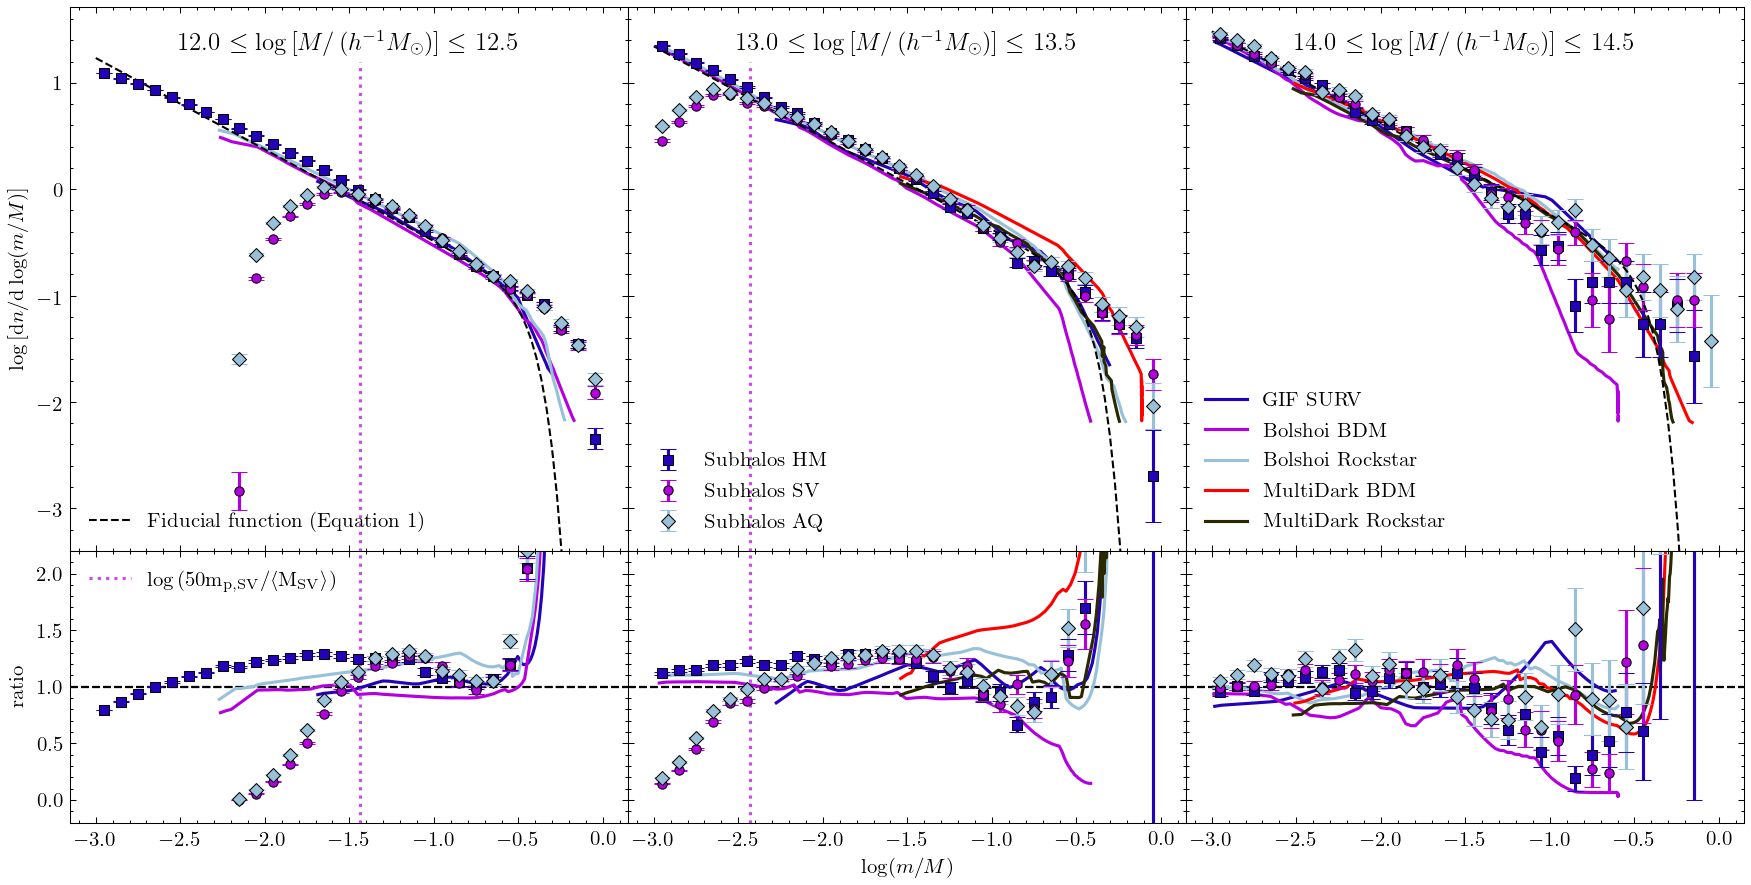

In [40]:
# (b) HM SHMFs computed with approximate (original sh finder run) subhalo results used for the four missing halos
sh_finder_comparison(sh_Mfof_convert(sh_HM0_using_approx, sod_HM0['fof_halo_tag'], sod_HM0['sod_halo_cdelta'], sod_HM0['sod_halo_mass'], SHMLM_HM), 
                     sh_SV0_Mdef, 
                     sh_AQ0_Mdef, 
                     'M200_to_Mvir', setoriglims=False, computeRatioFromSHMF=True, addFiducialModels=True, addvlinelim=True)

Subhalos with host in cdelta lookup table: 100.0% of all subhalos
subhalos (including centrals) found in sod catalog that have negative c: 1912 out of 4129978 (0.046295646126928526 %)
0.00017226674 624.9255

HM nH_sh 42183
HM number of subhalos in bin 544173
Mavg (sh centrals): 1.6948569e+12
SV nH_sh 41128
SV number of subhalos in bin 33739
Mavg (sh centrals): 1.7062902e+12
SV lim: -1.4359788010504735
AQ nH_sh 36524
AQ number of subhalos in bin 33586
Mavg (sh centrals): 1.7051474e+12
HM nH_sh 4965
HM number of subhalos in bin 563439
Mavg (sh centrals): 1.6872311e+13
SV nH_sh 4929
SV number of subhalos in bin 36355
Mavg (sh centrals): 1.6763596e+13
SV lim: -2.4282930957011684
AQ nH_sh 4354
AQ number of subhalos in bin 35611
Mavg (sh centrals): 1.673586e+13


/home/isultan/projects/itk/itk.py:161: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:177: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


HM nH_sh 373
HM number of subhalos in bin 376601
Mavg (sh centrals): 1.6009363e+14
SV nH_sh 331
SV number of subhalos in bin 20770
Mavg (sh centrals): 1.6238656e+14
AQ nH_sh 267
AQ number of subhalos in bin 18007
Mavg (sh centrals): 1.5054265e+14
ax1 ylim (-3.4, 1.71)
ax4 ylim (-0.2, 2.2)
ax1 xlim (-3.15, 0.15000000000000002)


/home/isultan/projects/itk/itk.py:161: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:177: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


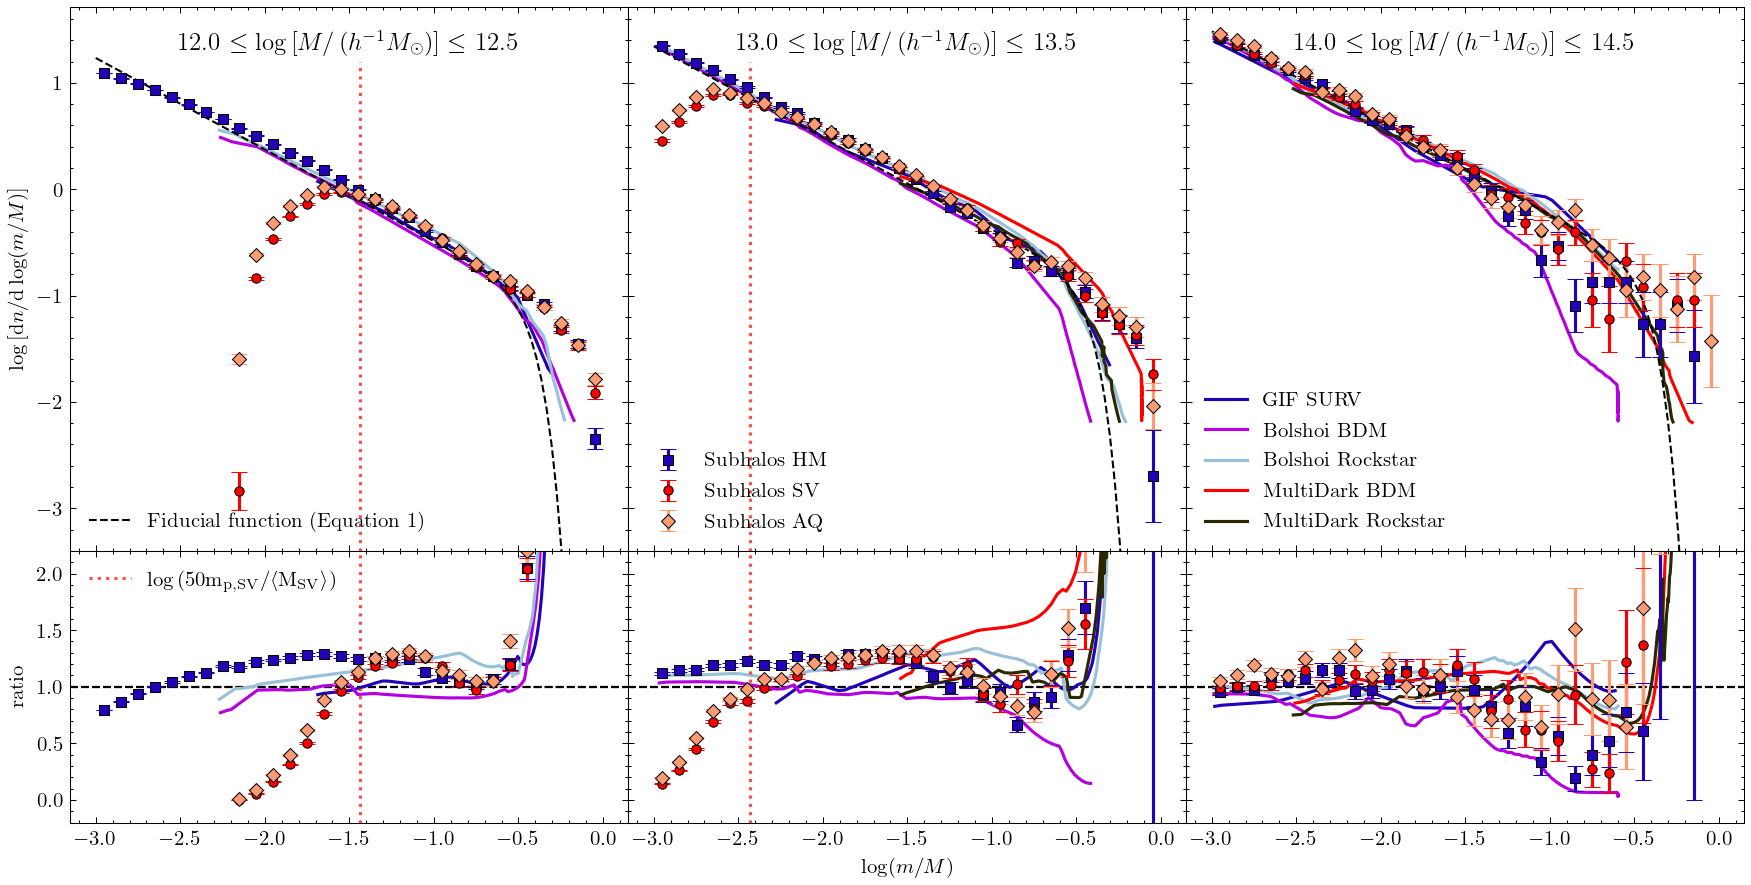

In [31]:
# (c) HM SHMFs computed with new approximate subhalo results used for the four missing halos
sh_finder_comparison(sh_Mfof_convert(sh_HM0_using_approxnew, sod_HM0['fof_halo_tag'], sod_HM0['sod_halo_cdelta'], sod_HM0['sod_halo_mass'], SHMLM_HM), 
                     sh_SV0_Mdef, 
                     sh_AQ0_Mdef, 
                     'M200_to_Mvir', setoriglims=False, computeRatioFromSHMF=True, addFiducialModels=True, addvlinelim=True,
                    point_colors=[COLOR_SCHEME[0], COLOR_SCHEME[3], COLOR_SCHEME[5]])

# verified that ax1.set_ylim(-3.4, 1.71) works for a,b,c
# plt.savefig('Paper2Figs/shmf_HM_SV_AQ_Mvir_SO_computeRatio_vline_approxc.pdf')
plt.savefig('Paper2Figs/shmf_HM_SV_AQ_Mvir_SO_computeRatio_vline_approxc_newcolors.pdf')

## M200 scatter plots

In [78]:
# plt.scatter(sod_HM0['fof_halo_mass'][sod_HM0['sod_halo_mass']>0], sod_HM0['sod_halo_mass'][sod_HM0['sod_halo_mass']>0], s=.01)
# plt.xscale('log')
# plt.yscale('log')
Mvir_subset = Mfof_to_Mso(SHMLM_HM, z=0, c=sod_HM0['sod_halo_cdelta'][sod_HM0['sod_halo_mass']>0] , Mfof=sod_HM0['fof_halo_mass'][sod_HM0['sod_halo_mass']>0], b=0.168, Delta=200)


# # H,xed,yed=np.histogram2d(np.log10(sod_HM0['fof_halo_mass'][sod_HM0['sod_halo_mass']>0]), np.log10(sod_HM0['sod_halo_mass'][sod_HM0['sod_halo_mass']>0]), bins=100, range=[(8,15), (8,15)])
# H,xed,yed=np.histogram2d(np.log10(Mvir_subset), np.log10(sod_HM0['sod_halo_mass'][sod_HM0['sod_halo_mass']>0]), bins=100, range=[(8,15), (8,15)])
# plt.pcolormesh(np.log10(H))
# plt.plot([0,100], [0,100], 'r--')
# plt.colorbar()

/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero 

(0.0, 250000000000000.0)

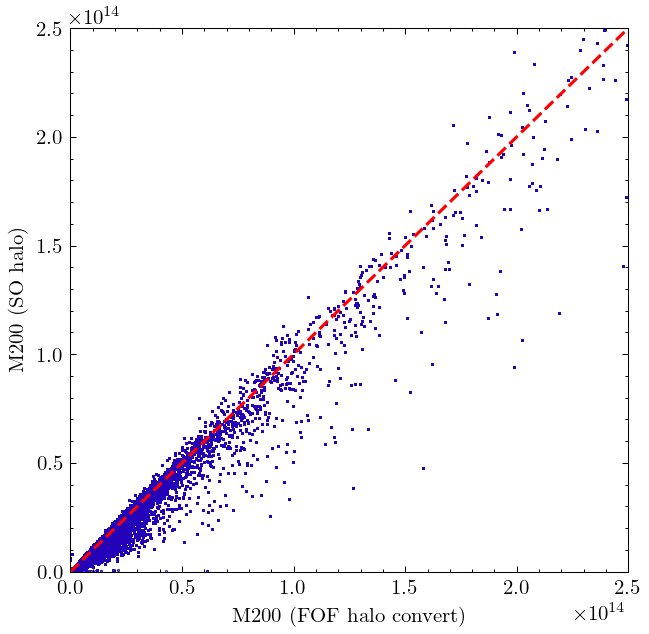

In [96]:
scatterm = sh_HM0_Mdef['M200']>0

plt.scatter(sh_HM0_Mdef['Mfof_to_M200'][scatterm], sh_HM0_Mdef['M200'][scatterm], s=.1, alpha=0.5)
plt.xlabel('M200 (FOF halo convert)')
plt.ylabel('M200 (SO halo)')
plt.plot([0, .25e15], [0,.25e15], 'r--')
plt.xlim(0, .25e15)
plt.ylim(0, .25e15)

In [102]:
((sod_HM0['sod_halo_mean_x']!=-101)==(sod_HM0['sod_halo_mass']!=-101)).all()

True

In [103]:
((sod_HM0['sod_halo_mean_x']!=-101)==(sod_HM0['sod_halo_mass']>0)).all()

True

/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero 

(0.0, 250000000000000.0)

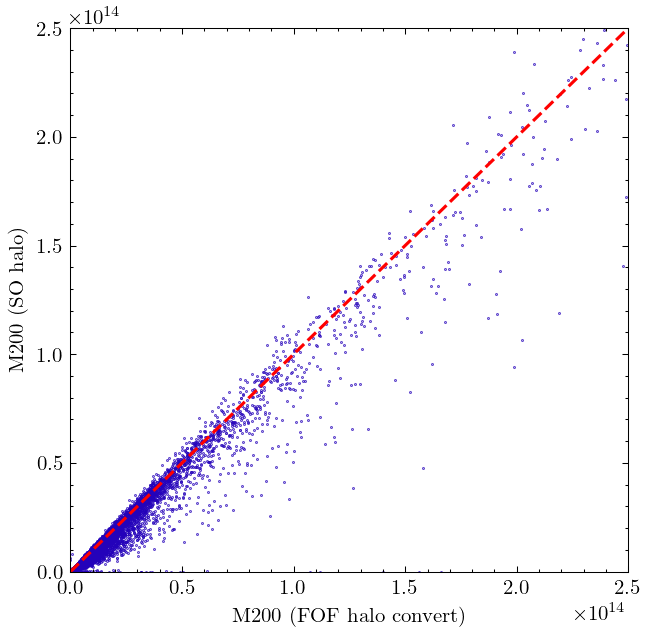

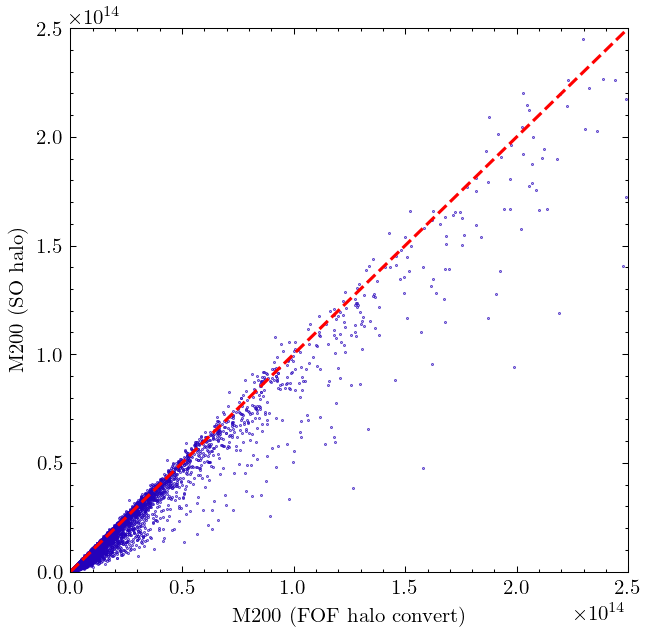

In [121]:
scatterm = sod_HM0['sod_halo_mean_x']!=-101
sod_HM0_scatter = {k:sod_HM0[k][scatterm].copy() for k in sod_HM0.keys()}

dist_scatter = SHMLM_HM.dist(
    periodic_bcs(sod_HM0_scatter['fof_halo_center_x'], sod_HM0_scatter['sod_halo_mean_x'], SHMLM_HM.BOXSIZE),
    periodic_bcs(sod_HM0_scatter['fof_halo_center_y'], sod_HM0_scatter['sod_halo_mean_y'], SHMLM_HM.BOXSIZE),
    periodic_bcs(sod_HM0_scatter['fof_halo_center_z'], sod_HM0_scatter['sod_halo_mean_z'], SHMLM_HM.BOXSIZE),
    sod_HM0_scatter['sod_halo_mean_x'],
    sod_HM0_scatter['sod_halo_mean_y'],
    sod_HM0_scatter['sod_halo_mean_z'] )

relaxed_scatterm = dist_scatter <= (0.07*sod_HM0_scatter['sod_halo_radius'])

Mfof_to_Mso_scatter = Mfof_to_Mso(SHMLM_HM, z=0, c=sod_HM0_scatter['sod_halo_cdelta'], Mfof=sod_HM0_scatter['fof_halo_mass'], b=0.168, Delta=200)

plt.scatter(Mfof_to_Mso_scatter, sod_HM0_scatter['sod_halo_mass'], s=.1, alpha=1)
plt.xlabel('M200 (FOF halo convert)')
plt.ylabel('M200 (SO halo)')
plt.plot([0, .25e15], [0,.25e15], 'r--')
plt.xlim(0, .25e15)
plt.ylim(0, .25e15)

plt.figure()
plt.scatter(Mfof_to_Mso_scatter[relaxed_scatterm], sod_HM0_scatter['sod_halo_mass'][relaxed_scatterm], s=.1, alpha=1)
plt.xlabel('M200 (FOF halo convert)')
plt.ylabel('M200 (SO halo)')
plt.plot([0, .25e15], [0,.25e15], 'r--')
plt.xlim(0, .25e15)
plt.ylim(0, .25e15)

In [122]:
relaxed_scatterm.sum()/len(relaxed_scatterm)*100

87.07666711870685

## MFOF Mvir comparisons

In [80]:
MfofMvir_mask = (sh_SV0_Mdef['subhalo_tag']==0)&((sh_SV0_Mdef['M200']>0))&(sh_SV0_Mdef['M']<10**13)

[1.01949220e+00 2.84566847e+10]


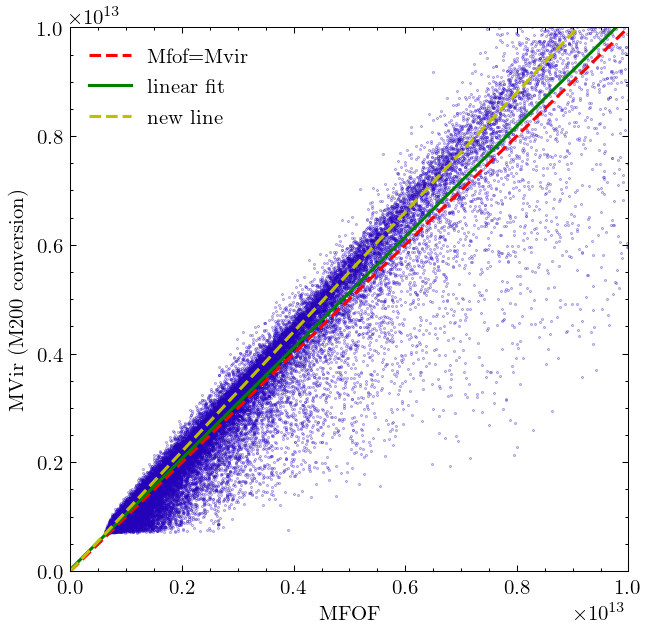

In [91]:
plt.scatter(sh_SV0_Mdef['M'][MfofMvir_mask], sh_SV0_Mdef['M200_to_Mvir'][MfofMvir_mask], s=.1, alpha=0.5)
plt.xlabel('MFOF')
plt.ylabel('MVir (M200 conversion)')
plt.plot([0, 1e13], [0,1e13], 'r--', label='Mfof=Mvir')
plt.xlim(0, 10**13)
plt.ylim(0, 10**13)

poly1d_MfofMvir = np.polyfit(sh_SV0_Mdef['M'][MfofMvir_mask], sh_SV0_Mdef['M200_to_Mvir'][MfofMvir_mask], 1)
plt.plot(np.linspace(0, 10**13), np.polyval(poly1d_MfofMvir, np.linspace(0, 10**13)), c='g', label='linear fit')

plt.plot(np.linspace(0, 10**13), np.polyval([1.1,0], np.linspace(0, 10**13)), c='y', label='new line')

plt.legend()
print(poly1d_MfofMvir)